### 0. Importing Libraries

In [2]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Problem statement and data collection

In [4]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


----------------------------------------------------------------

### 2. Exploration and data cleaning 

#### 2.1 Understanding the features:
- age - Age of customer (numeric)
- job - Type of job (categorical)
- marital - Marital status (categorical)
- education - Level of education (categorical)
- default - Do you currently have credit (categorical)
- housing - Do you have a housing loan (categorical)
- loan - Do you have a personal loan? (categorical)
- contact - Type of contact communication (categorical)
- month - Last month in which you have been contacted (categorical)
- day_of_week - Last day on which you have been contacted (categorical)
- duration - Duration of previous contact in seconds (numeric)
- campaign - Number of contacts made during this campaign to the customer (numeric)
- pdays - Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- previous - Number of contacts made during the previous campaign to the customer (numeric)
- poutcome - Result of the previous marketing campaign (categorical)
- emp.var.rate - Employment variation rate. Quarterly indicator (numeric)
- cons.price.idx - Consumer price index. Monthly indicator (numeric)
- cons.conf.idx - Consumer confidence index. Monthly indicator (numeric)
- euribor3m - EURIBOR 3-month rate. Daily indicator (numeric)
- nr.employed - Number of employees. Quarterly indicator (numeric)
- y - TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [8]:
print('Our dataframe contains {} rows and it has {} features.'.format(len(df), df.shape[1]))

Our dataframe contains 41188 rows and it has 21 features.


----------------------------------------------------------------

#### 2.2 Identifying Null Values and data types for each feature

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

##### Conclusions: 
- We don't have any nulls in the dataframe and we have categorical and numerical features. 

----------------------------------------------------------------

##### 2.3 Eliminating Irrelevant Information and dealing with null values

In [16]:
df.drop(columns=['month','day_of_week'], axis=1, inplace=True)
df.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Reasoning behind dropping those features:
1. ```'month'``` - Seasonality should not be a factor in the analysis, therefore we have decided to remove this feature. 
2. ```'day_of_week'``` - Same as our ```month``` feature, this should not be highly relevant in predicting customer responses to campaigns.

----------------------------------------------------------------

### 3. Univariate Analysis 

#### 3.1 Dividing our dataset into categorial and numerical. 

In [21]:
# Understanding how many type of features we have
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [22]:
# Dividing our dataframe by numerical and categorical features
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

----------------------------------------------------------------

#### 3.2 Categorical Variable Analysis 

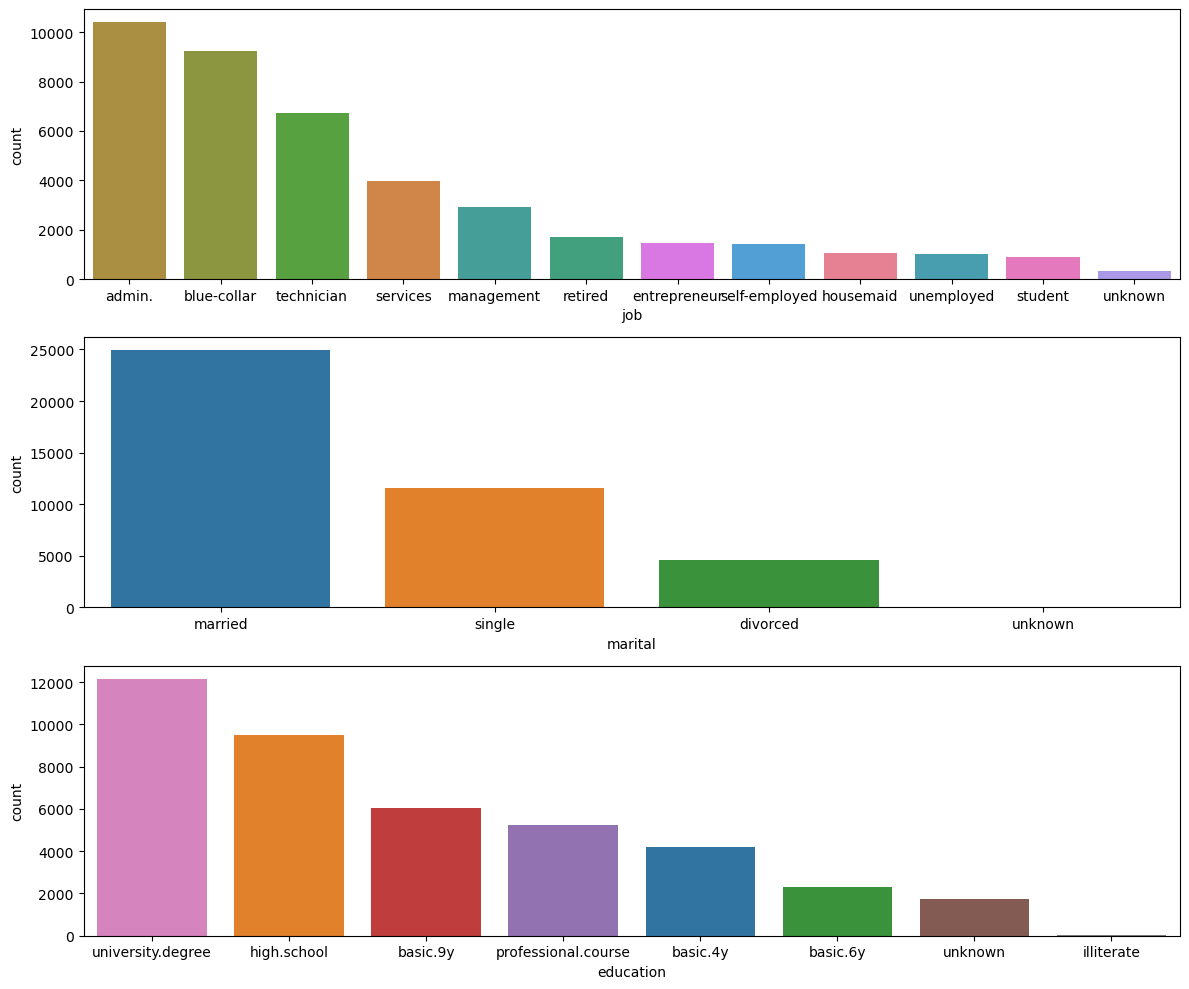

In [25]:
fig, ax = plt.subplots(3, 1, figsize = (12, 10))
sns.countplot(ax= ax[0], data = df_cat, x = 'job', order=df_cat['job'].value_counts().index, hue='job')
sns.countplot(ax = ax[1], data = df_cat, x = 'marital', order=df_cat['marital'].value_counts().index, hue='marital')
sns.countplot(ax = ax[2], data = df_cat, x = 'education', order=df_cat['education'].value_counts().index, hue='education')

plt.tight_layout()
plt.show()

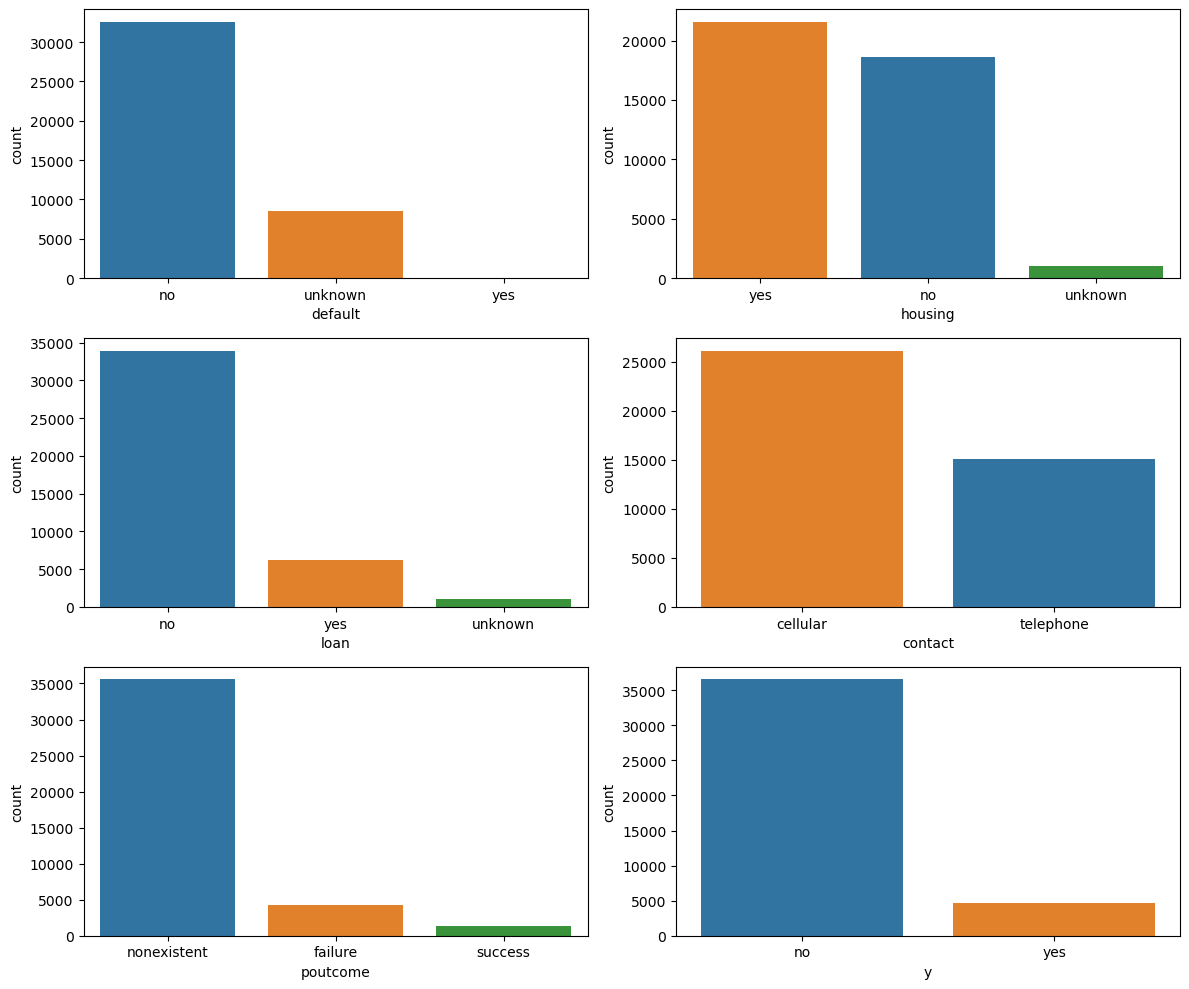

In [26]:
fig, ax = plt.subplots(3, 2, figsize = (12, 10))

sns.countplot(ax = ax[0,0], data = df_cat, x = 'default', order=df_cat['default'].value_counts().index, hue='default')
sns.countplot(ax = ax[0,1], data = df_cat, x = 'housing', order=df_cat['housing'].value_counts().index, hue='housing')

sns.countplot(ax = ax[1,0], data = df_cat, x = 'loan', order=df_cat['loan'].value_counts().index, hue='loan')
sns.countplot(ax = ax[1,1], data = df_cat, x = 'contact', order=df_cat['contact'].value_counts().index, hue='contact')

sns.countplot(ax = ax[2,0], data = df_cat, x = 'poutcome', order=df_cat['poutcome'].value_counts().index, hue='poutcome')
sns.countplot(ax = ax[2,1], data = df_cat, x = 'y', order=df_cat['y'].value_counts().index, hue='y')

plt.tight_layout()
plt.show()

##### Conclusions

- The majority of individuals work in administrative, blue-collar, and technical roles, with "admin." being the most common job category.
- Most people are married, with a significantly smaller portion being single or divorced.
- University degrees and high school diplomas are the most common educational levels, where Basic education (4, 6, and 9 years) is also represented but less prevalent.
- Most individuals do not have a credit default, with only a small number marked as "unknown" and even fewer with an actual default.
- A slightly larger proportion of individuals have a housing loan compared to those without one. There is a minimal number of "unknown" entries.
- The majority do not have a personal loan, with only a small fraction having one or with unknown status.
- "Cellular" is the predominant contact method, almost double the frequency of "telephone."
- For most individuals, there was no previous marketing campaign ("nonexistent"). Among those with previous campaigns, failures are more common than successes.
- Most individuals did not respond positively ("no") to the campaign, with a smaller subset showing a positive response ("yes").

---------------------------------------------------------------

#### 3.3 Numerical Variable Analysis 

In [30]:
df_num.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


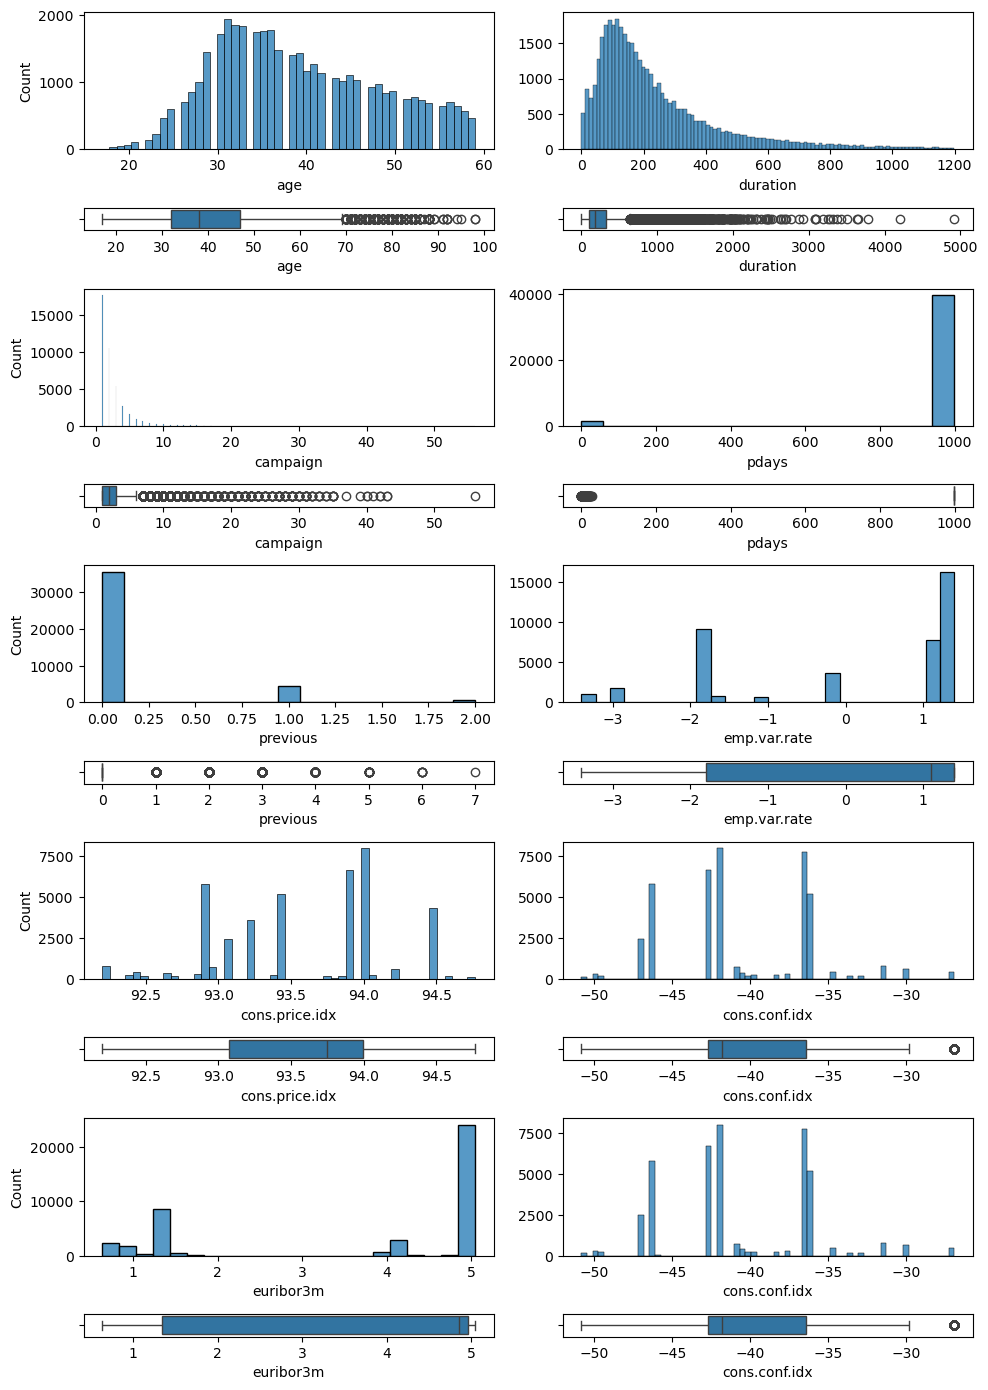

In [31]:
fig, ax = plt.subplots(10, 2, figsize=(10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = df_num[df_num['age']<60], x='age')
sns.boxplot(ax = ax[1,0], data = df_num, x='age')
sns.histplot(ax = ax[0,1], data = df_num[df_num['duration']<1200], x='duration').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='duration')

# Charts second row 
sns.histplot(ax = ax[2,0], data = df_num, x='campaign')
sns.boxplot(ax = ax[3,0], data = df_num, x='campaign')
sns.histplot(ax = ax[2,1], data = df_num, x='pdays').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='pdays')

# Charts third row 
sns.histplot(ax = ax[4,0], data = df_num[df_num['previous']<3], x='previous')
sns.boxplot(ax = ax[5,0], data = df_num, x='previous')
sns.histplot(ax = ax[4,1], data = df_num, x='emp.var.rate').set(ylabel = None)
sns.boxplot(ax = ax[5,1], data = df_num, x='emp.var.rate')

# Charts fourth row 
sns.histplot(ax = ax[6,0], data = df_num, x='cons.price.idx')
sns.boxplot(ax = ax[7,0], data = df_num, x='cons.price.idx')
sns.histplot(ax = ax[6,1], data = df_num, x='cons.conf.idx').set(ylabel = None)
sns.boxplot(ax = ax[7,1], data = df_num, x='cons.conf.idx')

# Charts last row 
sns.histplot(ax = ax[8,0], data = df_num, x='euribor3m')
sns.boxplot(ax = ax[9,0], data = df_num, x='euribor3m')
sns.histplot(ax = ax[8,1], data = df_num, x='cons.conf.idx').set(ylabel = None)
sns.boxplot(ax = ax[9,1], data = df_num, x='cons.conf.idx')

plt.tight_layout()
plt.show()

##### Conclusions
- The latitude and longitude distributions suggest a central clustering of Airbnb listings in the most popular parts of New York City.
- The majority of properties are relatively affordable, with a concentration around 100 USD to 200 USD per night, though there are some high-end properties priced well above the norm.
- Most properties have a low minimum night requirement, making them attractive for short-term stays, though a few require longer commitments.
- The number of reviews and reviews per month distributions show that most listings receive relatively few reviews, suggesting that they may not be booked frequently or are newer listings.
- Hosts predominantly manage just one or two properties, suggesting that most listings are from individual or small-scale operators, although a few outliers manage a large number of listings.
- The bimodal distribution of availability suggests that some listings are either always available or completely inactive, indicating a mix of dedicated hosts and potentially seasonal or inactive listings.

----------------------------------------------------------------

### 4. Multivariate Analysis 

#### 4.1 Encoding Categorical Values and Saving JSON files

In [36]:
df_enc = df.copy()

In [37]:
# Creating encoders for categorical features and saving them as JSON files. All files prefixed with 'enc'
# contain the encoding dictionaries for each categorical feature.
for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    globals()[f"{column}_enc"] = dict(zip(unique_values, range(len(unique_values))))

    json.dump(globals()[f"{column}_enc"], open(f'../data/interim/enc_{column}.json', 'w'))

In [38]:
# Replacing the values in our categorical features to our encoded values (numerical)
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

In [39]:
df_enc.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


----------------------------------------------------------------

#### 4.2 Numerical - categorical analysis (Correlation Analysis)

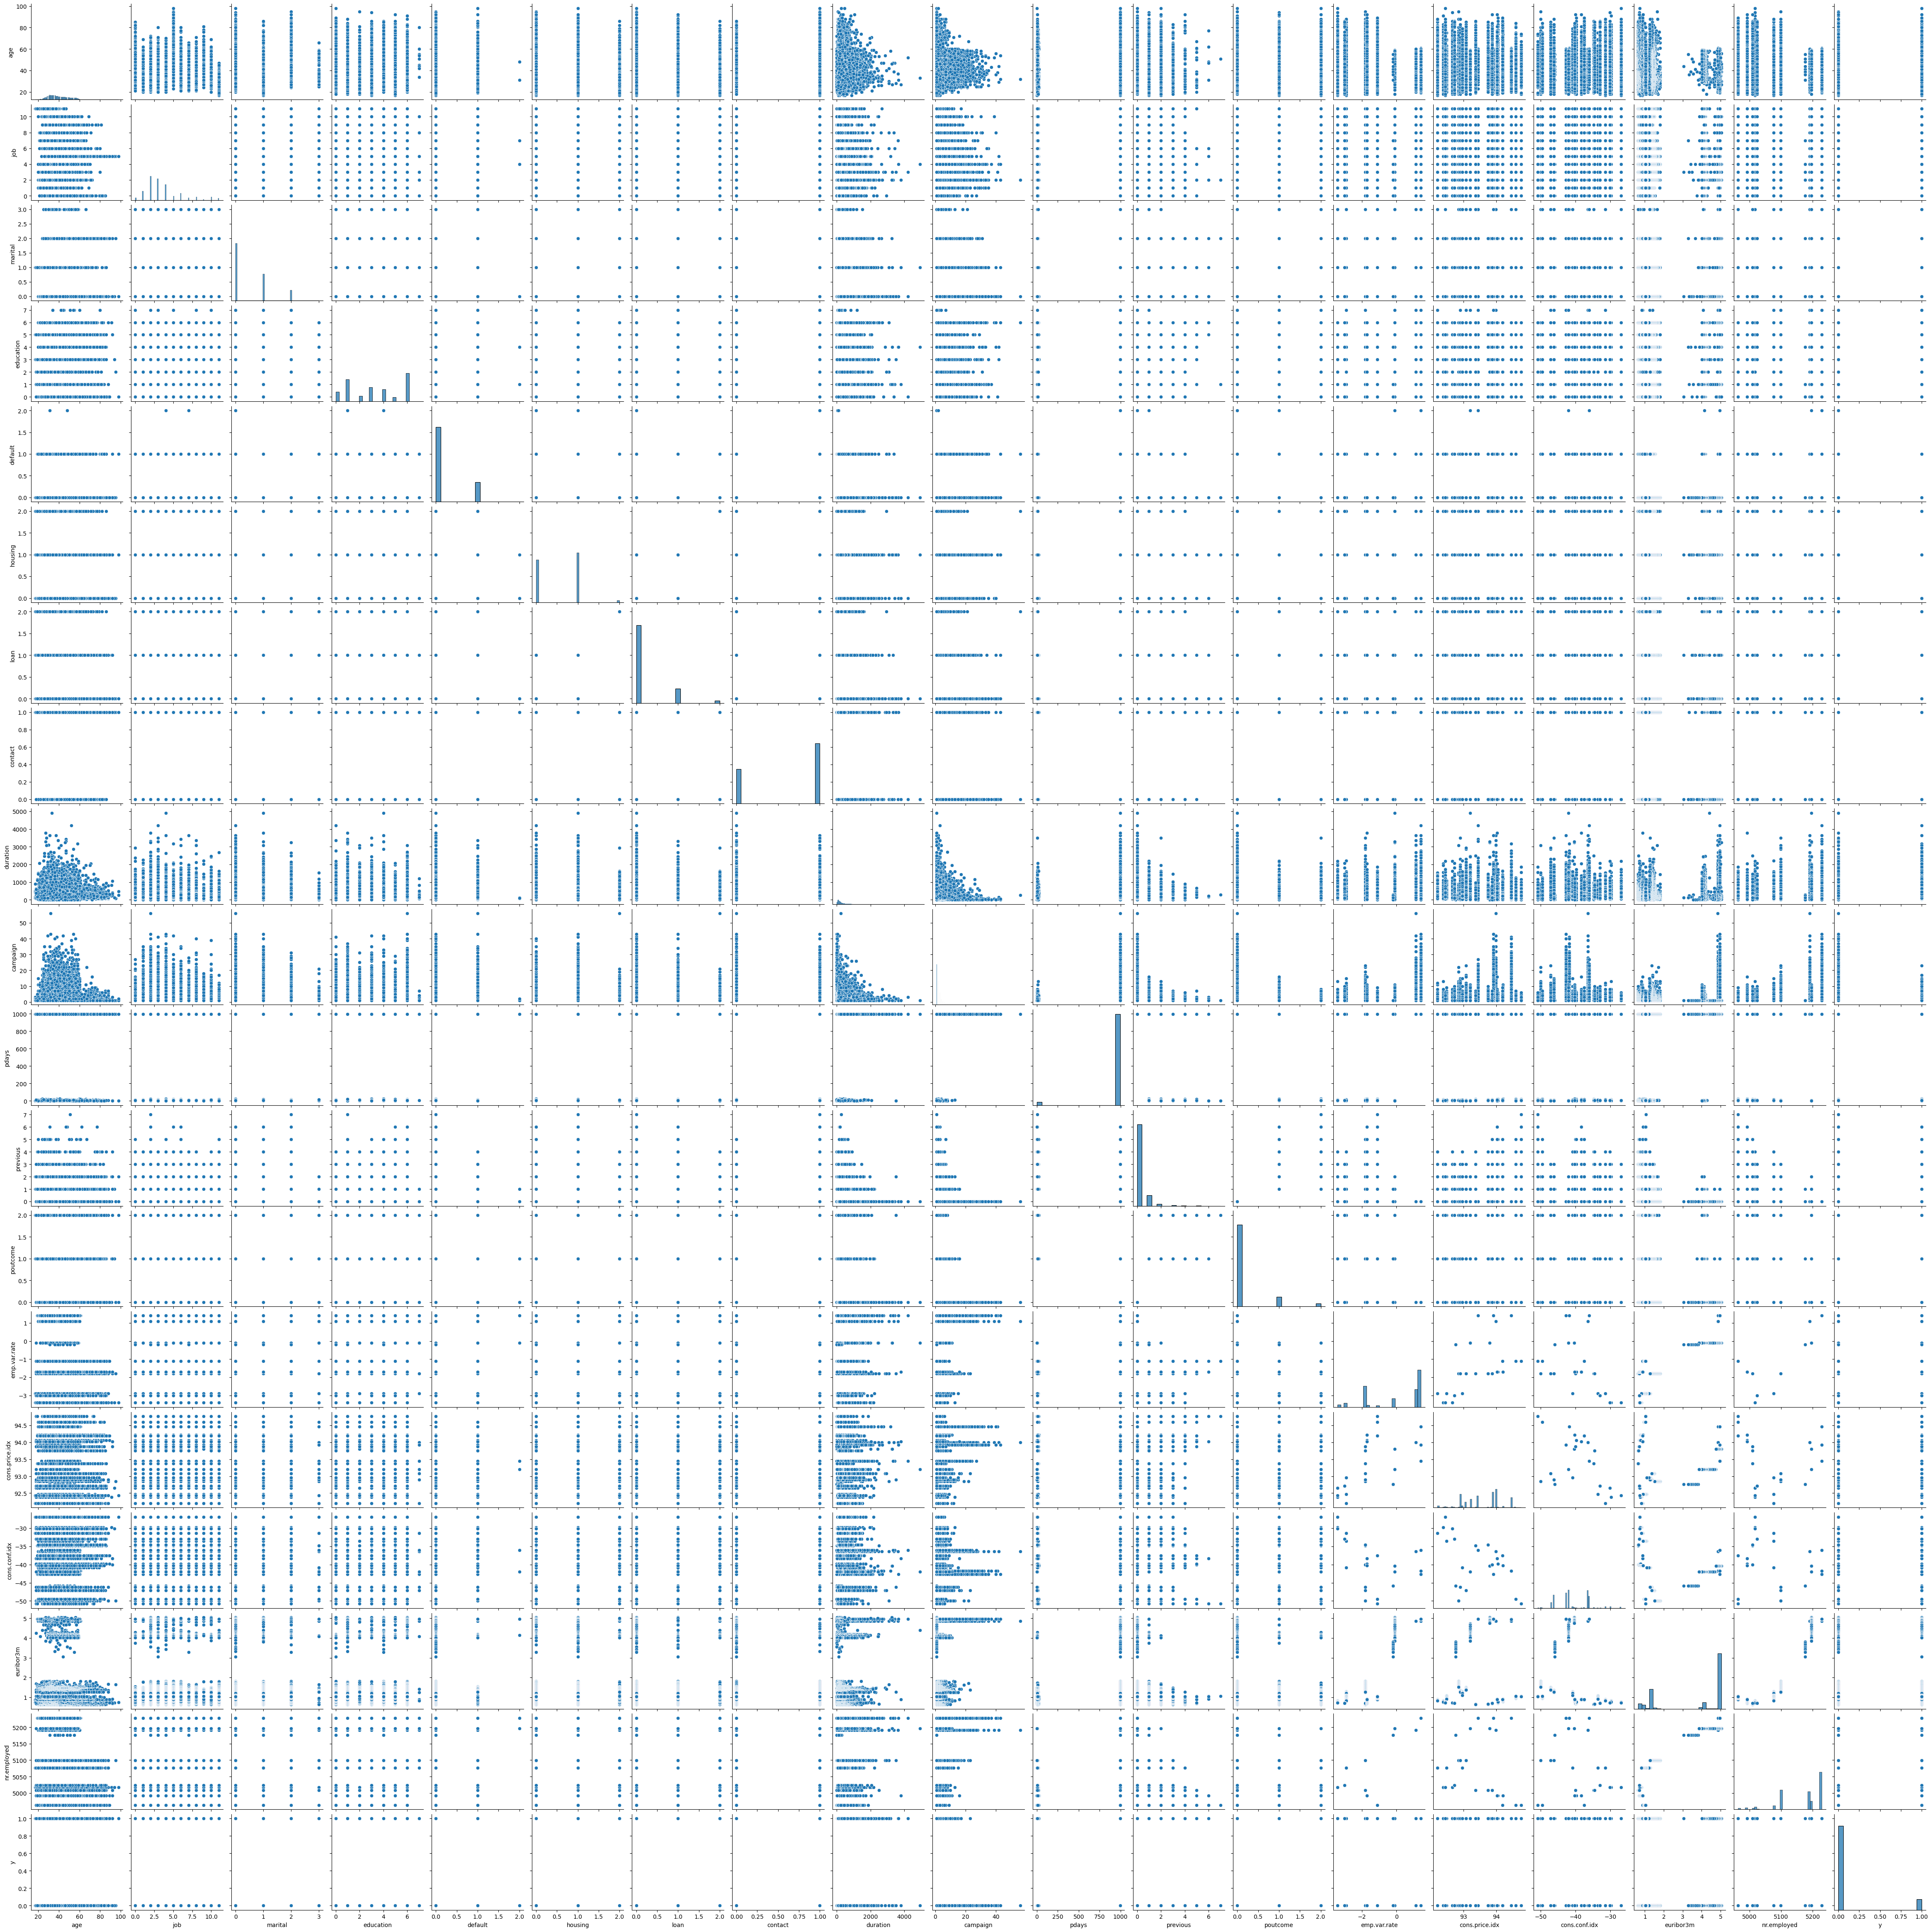

In [42]:
sns.pairplot(data=df_enc)
plt.show()

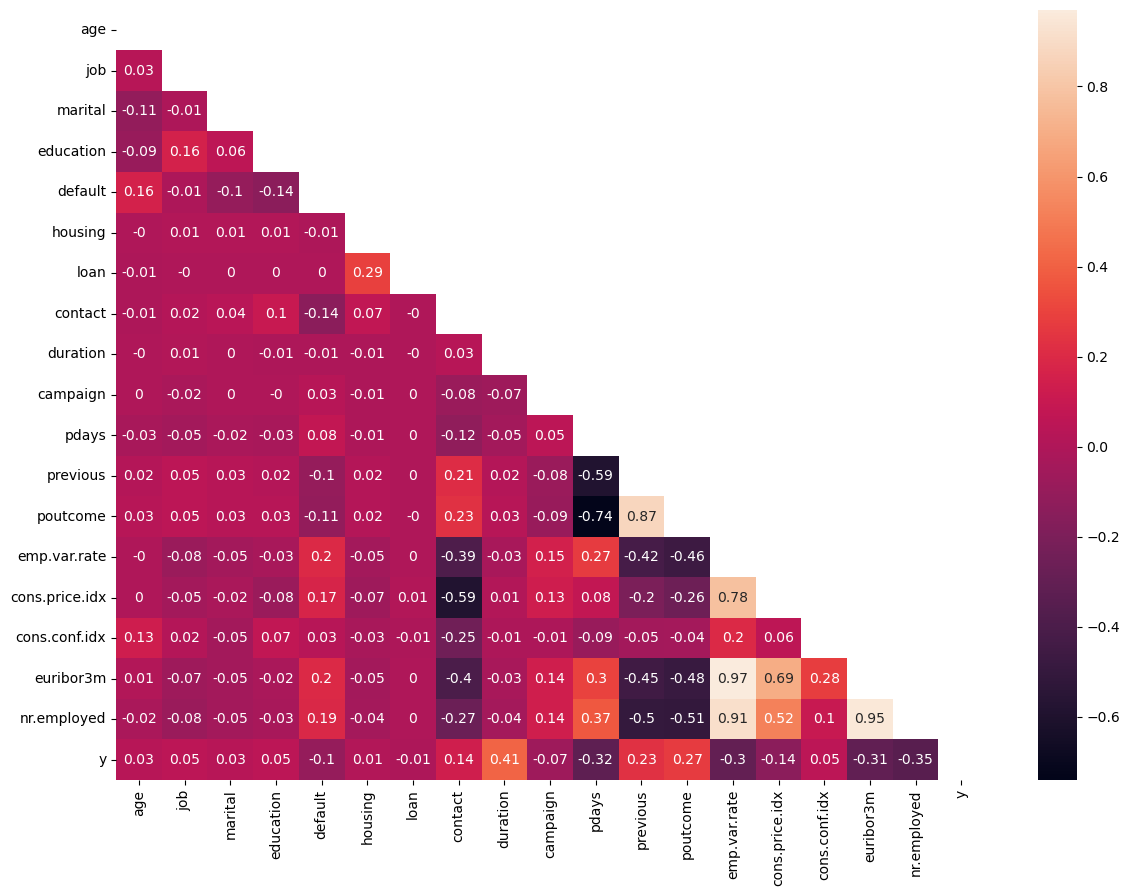

In [43]:
plt.figure(figsize=(14,10))
sns.heatmap(df_enc.corr().round(2), annot=True, mask=np.triu(df_enc.corr()))
plt.show()

###### Conclusions:
**Strong Positive Correlation:**
- ```emp.var.rate``` and ```euribor3m``` have a very high correlation (0.97). This suggests that both indicators are strongly related, likely because they refer to economic variables that tend to vary in sync in a macroeconomic context.
- ```nr.employed``` is also highly correlated with ```emp.var.rate``` (0.91) and ```euribor3m``` (0.95), indicating that the number of employees tends to be linked with these economic variables.
**Moderate Relationship with the Target Variable (y):**
- ```poutcome``` has a moderate correlation (0.32) with ```y```, suggesting that the outcome of the previous campaign could significantly influence the current campaign's result. This may be useful for predicting the likelihood of success in future marketing campaigns.
- ```duration``` also shows a moderate correlation (0.41) with ```y```. This is a common finding in telemarketing campaigns, as the call duration is often related to the likelihood of conversion success.
**Negative Correlations:**
- ```emp.var.rate```, ```euribor3m```, and ```nr.employed``` show negative correlations with ```y```, of -0.35, -0.31, and -0.35, respectively. This could indicate that in more favorable economic conditions, the probability of campaign success decreases.
**Low Correlation among Other Variables:**
- Most other variables show low correlations with each other and with ```y``` (our target), indicating that they may not have a significant influence on the campaign outcome or that their relationship is weak.

-------------------------------------------------------

### 5. Feature Engineering 
#### 5.1 New feature Inference

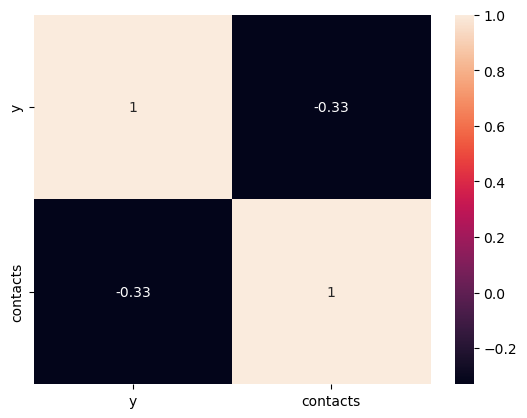

In [47]:
contact_features = df_enc[['campaign', 'previous', 'pdays']]

df_enc['contacts'] = contact_features.sum(axis=1)
contact_f = df_enc[['y', 'contacts']]
sns.heatmap(contact_f.corr().round(2), annot=True)
plt.show()

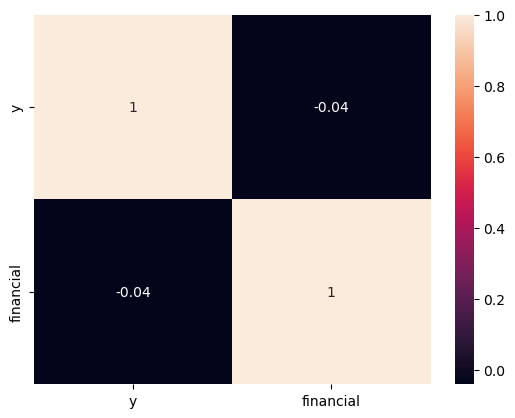

In [48]:
financial_features = df_enc[['housing', 'loan', 'default']]

df_enc['financial'] = financial_features.sum(axis=1)
financial_f = df_enc[['y', 'financial']]
sns.heatmap(financial_f.corr().round(2), annot=True)
plt.show()

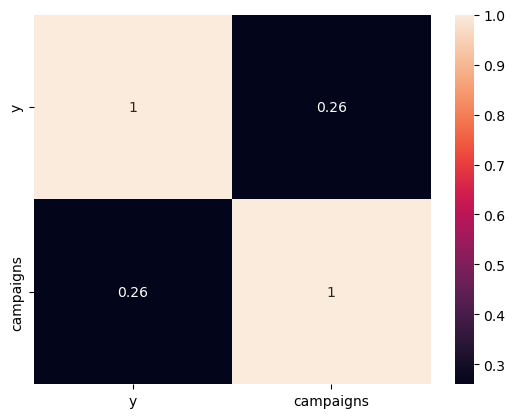

In [49]:
campaign_features = df_enc[['poutcome', 'previous']]

df_enc['campaigns'] = campaign_features.sum(axis=1)
campaign_f = df_enc[['y', 'campaigns']]
sns.heatmap(campaign_f.corr().round(2), annot=True)
plt.show()

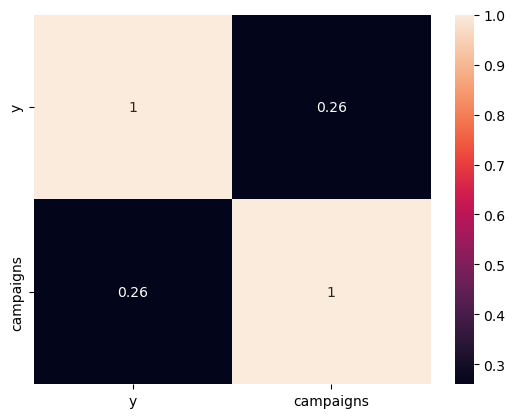

In [50]:
demographic_features = df_enc[['age', 'job', 'marital', 'education']]

df_enc['demographic'] = demographic_features.sum(axis=1)
demographic_f = df_enc[['y', 'demographic']]
sns.heatmap(campaign_f.corr().round(2), annot=True)
plt.show()

**Conclusion:**
- **Marketing Contacts:** Created a new feature for contact frequency by summing ```campaign```, ```previous```, and ```pdays```. This could represent the "historical contact intensity" and help capture the frequency of previous interactions with the customer.
- **Financial Profile:** Merged ```housing```, ```loan```, and ```default``` into a variable that represents the customer’s financial profile.
- **Previous Campaign Outcomes:** Use ```poutcome``` along with ```previous``` to create a feature reflecting the success history in previous campaigns. This could be a score measuring the likelihood of a positive response based on past campaigns.
- **Demographic Profile:** Combined ```age```, ```job```, ```marital```, and ```education``` into a feature representing the customer’s socio-demographic profile. This could group customers with similar characteristics who might respond similarly to campaigns.

In [52]:
df_enc.drop(columns=['campaign', 'previous', 'pdays', 'housing', 'loan', 'default', 'poutcome', 
                     'age', 'job', 'marital', 'education'], inplace=True)

df_enc.head()

,contact,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacts,financial,campaigns,demographic
0,0,261,1.1,93.994,-36.4,4.857,5191.0,0,1000,0,0,56
1,0,149,1.1,93.994,-36.4,4.857,5191.0,0,1000,1,0,59
2,0,226,1.1,93.994,-36.4,4.857,5191.0,0,1000,1,0,39
3,0,151,1.1,93.994,-36.4,4.857,5191.0,0,1000,0,0,44
4,0,307,1.1,93.994,-36.4,4.857,5191.0,0,1000,1,0,58


-------------------------------------------------------

#### 5.2 Outlier Analysis

Perform an outlier analysis exclusively on continuous features; outliers in discrete features should be addressed separately without changing their data. 

In [56]:
df_enc.describe().round(2)

,contact,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacts,financial,campaigns,demographic
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,0.63,258.29,0.08,93.58,-40.50,3.62,5167.04,0.11,965.22,0.98,0.34,47.49
std,0.48,259.28,1.57,0.58,4.63,1.73,72.25,0.32,186.79,0.90,0.92,10.84
min,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,2.00,0.00,0.00,23.00
25%,0.00,102.00,-1.80,93.08,-42.70,1.34,5099.10,0.00,1000.00,0.00,0.00,40.00
50%,1.00,180.00,1.10,93.75,-41.80,4.86,5191.00,0.00,1001.00,1.00,0.00,46.00
75%,1.00,319.00,1.40,93.99,-36.40,4.96,5228.10,0.00,1002.00,1.00,0.00,54.00
max,1.00,4918.00,1.40,94.77,-26.90,5.04,5228.10,1.00,1055.00,5.00,9.00,104.00


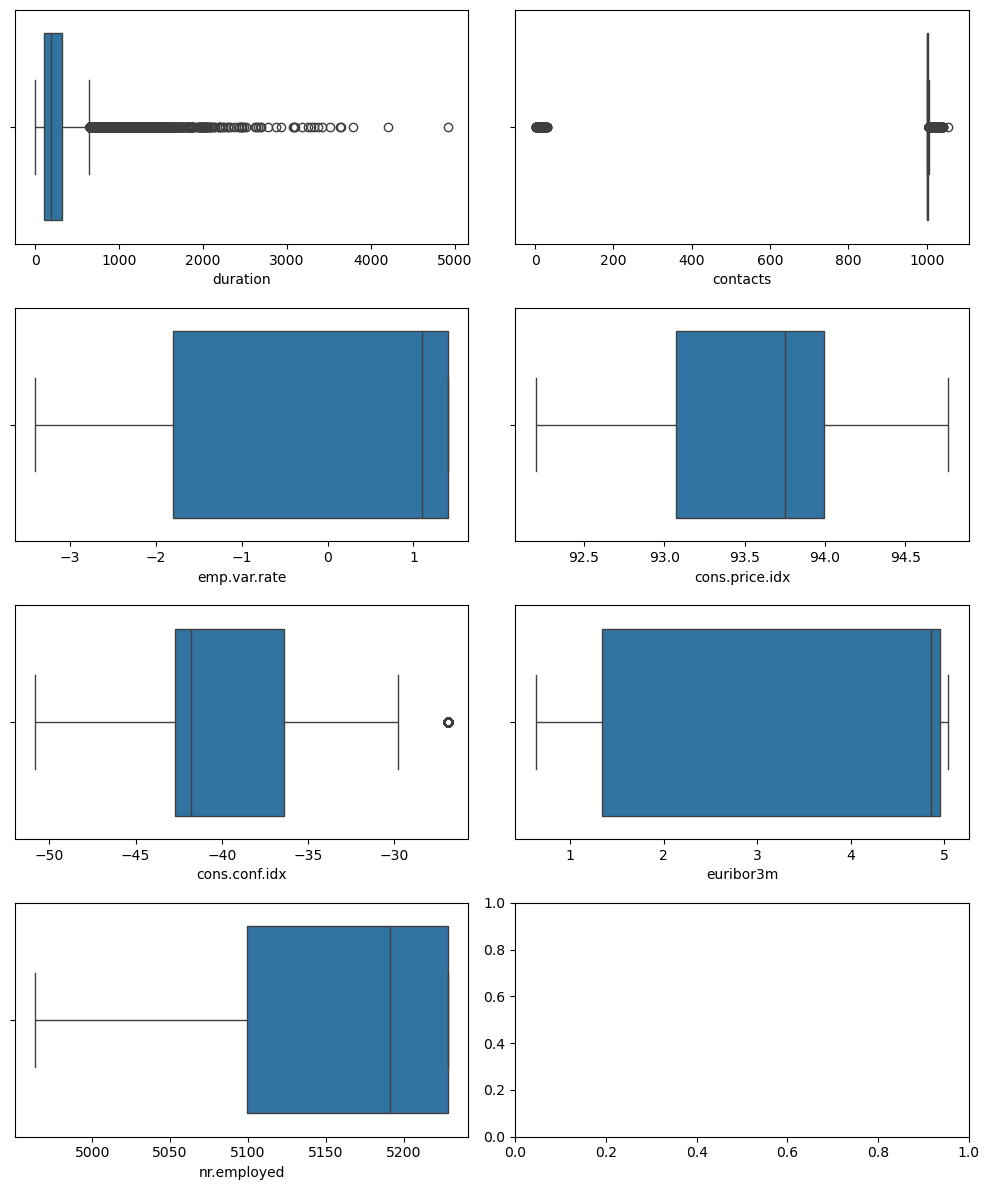

In [57]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = df_enc, x='duration')
sns.boxplot(ax = ax[0,1], data = df_enc, x='contacts')

sns.boxplot(ax = ax[1,0], data = df_enc, x='emp.var.rate')
sns.boxplot(ax = ax[1,1], data = df_enc, x='cons.price.idx')

sns.boxplot(ax = ax[2,0], data = df_enc, x='cons.conf.idx')
sns.boxplot(ax = ax[2,1], data = df_enc, x='euribor3m')

sns.boxplot(ax = ax[3,0], data = df_enc, x='nr.employed')

plt.tight_layout()
plt.show()

We will calculate the outlier limits for ```duration```, ```contacts```, and ```cons.conf.idx```. This data will be used to create a new data frame without outliers (```df_enc_no```), which we will use to train our model and compare performance to determine the best approach.

In [59]:
# Creating a copy of our df to remove outliers 
df_enc_no = df_enc.copy()

In [60]:
# This function returns our new df without outliers and the features' limits.  
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [61]:
f_outliers_no_neg = ['duration', 'contacts']
f_outliers_with_neg = ['cons.conf.idx']

In [62]:
for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

--------------------------------------------------------

#### 5.3 Missing Values

In [65]:
df_enc.isna().sum()[df_enc.isna().sum()>0]

Series([], dtype: int64)

<Axes: >

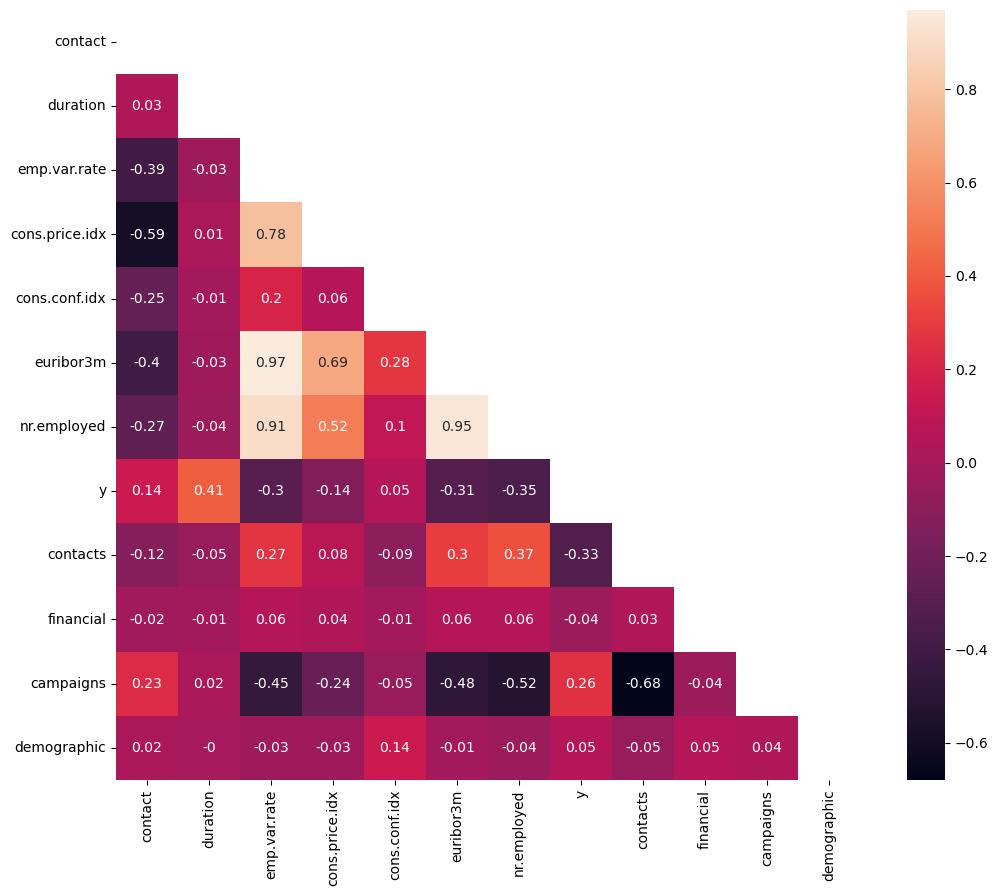

In [66]:
plt.figure(figsize=(12,10))
sns.heatmap(df_enc.corr().round(2), annot=True, mask=np.triu(df_enc.corr()))

--------------------------------------------------------

#### 5.4 Split train/test of both Data Frames

In [69]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

Now, we split our data into train and test sets using the function ```split``` created earlier. This will be for all necessary data frames created earlier (original, normalized, and min-max scaled for both, with outliers and without outliers).

In [71]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('y', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('y', df_enc_no)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

--------------------------------------------------------

#### 5.5 Normalization

In [74]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/processed/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [75]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

--------------------------------------------------------

#### 5.5 Min-Max Scaling

In [78]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/processed/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [79]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

--------------------------------------------------------

### 6. Feature Selection 

In [82]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/processed/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [83]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 11, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 11, 'without_outliers')

In [84]:
X_train_with_outliers_sel.head()

,contact,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contacts,financial,campaigns,demographic
0,0.0,178.0,1.1,93.994,-36.4,4.857,5191.0,1001.0,0.0,0.0,46.0
1,1.0,256.0,-1.7,94.215,-40.3,0.835,4991.6,1003.0,0.0,2.0,28.0
2,0.0,42.0,1.4,94.465,-41.8,4.959,5228.1,1004.0,1.0,0.0,46.0
3,1.0,442.0,1.4,93.918,-42.7,4.963,5228.1,1001.0,2.0,0.0,32.0
4,1.0,107.0,1.4,93.444,-36.1,4.964,5228.1,1003.0,0.0,0.0,47.0


#### 6.1 Applying the columns filter (kselection) to the normalized and minmax scaled data frames

In [86]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

#### 6.2 Saving the CSV files 

In [88]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)
    

### Machine Learning 
#### 1.0 Decision Making: Which is the best dataset? 

In [90]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [91]:
results = []

for index in range(len(train)):
    model = LogisticRegression()
    train_df = train[index]
    model.fit(train_df, y_train)
    y_train_pred = model.predict(train_df)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],
            'train_score': accuracy_score(y_train, y_train_pred),
            'test_score': accuracy_score(y_test, y_test_pred)
        }
    )

results = sorted(results, key=lambda x: x['train_score'], reverse=True)
best_ind = results[0]['index']
best_df_train = results[0]['df_train']
results

[{'index': 2,
  'df_train': 'X_train_with_outliers_norm_sel',
  'train_score': 0.9096813353566009,
  'test_score': 0.9123573682932751},
 {'index': 4,
  'df_train': 'X_train_with_outliers_minmax_sel',
  'train_score': 0.9089226100151745,
  'test_score': 0.9122359796067007},
 {'index': 0,
  'df_train': 'X_train_with_outliers_sel',
  'train_score': 0.908649468892261,
  'test_score': 0.9129643117261471},
 {'index': 3,
  'df_train': 'X_train_without_outliers_norm_sel',
  'train_score': 0.9077389984825494,
  'test_score': 0.9102937606215101},
 {'index': 5,
  'df_train': 'X_train_without_outliers_minmax_sel',
  'train_score': 0.9072837632776934,
  'test_score': 0.910536537994659},
 {'index': 1,
  'df_train': 'X_train_without_outliers_sel',
  'train_score': 0.9020333839150227,
  'test_score': 0.903495994173343}]

#### 1.1 GridSearch

In [94]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

model = LogisticRegression()
model.fit(dfs_train.get(best_df_train), y_train)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid.fit(dfs_train.get(best_df_train), y_train)
print(f'The best hyperparameters are: {grid.best_params_}')

The best hyperparameters are: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [96]:
model_grid = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model_grid.fit(dfs_train.get(best_df_train), y_train)
y_pred = model_grid.predict(dfs_test.get(list(dfs_test)[best_ind]))
grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9126001456664239

#### 1.1 RandomSearch

In [98]:
hyperparams = {
    "C": np.logspace(0.01, 100, 10),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 123)
random_search.fit(dfs_train.get(best_df_train), y_train)
print(f'The best hyperparameters are: {random_search.best_params_}')

The best hyperparameters are: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1e+100}


In [100]:
model_rsearch = LogisticRegression(C=1e+100, penalty='l1', solver='liblinear')
model_rsearch.fit(dfs_train.get(best_df_train), y_train)
y_pred = model_rsearch.predict(dfs_test.get(list(dfs_test)[best_ind]))
rsearch_accuracy = accuracy_score(y_test, y_pred)
rsearch_accuracy

0.9124787569798495